In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import opencl_dimensionless as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [13]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -100 # Pa/m

pipe_length = 3*D # meter

# initialize cylinder
cylinder_center = [pipe_length/4, D/2]
cylinder_radius = D/10

sim = lb.Pipe_Flow_Cylinder(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                             N=25, time_prefactor=1.,
                             cylinder_center=cylinder_center, cylinder_radius=cylinder_radius,
                             two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 0.1
Characteristic T: 0.008
Reynolds number: 156.25
inlet rho: 1.009228288
outlet rho: 1.0
omega 1.92604006163
2d global: (768, 256)
2d local: (32, 32)
3d global: (768, 256, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices


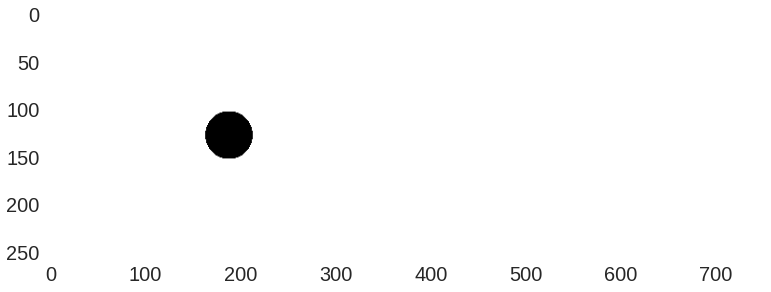

In [14]:
plt.imshow(sim.obstacle_mask_host.T)
plt.grid(False)

In [28]:
time_to_run = 10
num_steps = int(time_to_run/sim.delta_t)
print 'Running for', num_steps

Running for 6250


In [29]:
sim.run(num_steps)

<matplotlib.colorbar.Colorbar instance at 0x7f27cdbfedd0>

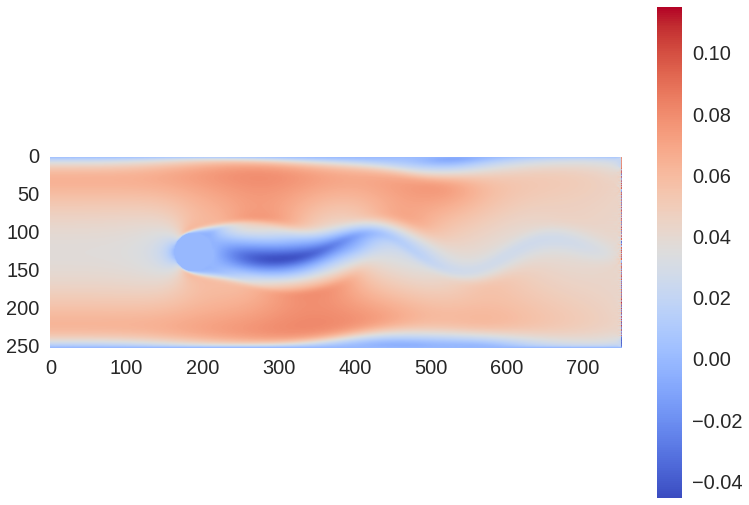

In [30]:
fields = sim.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)

plt.grid(False)
plt.colorbar()

Ok, this is looking more like it. Good. Let's see how developed the flow is.

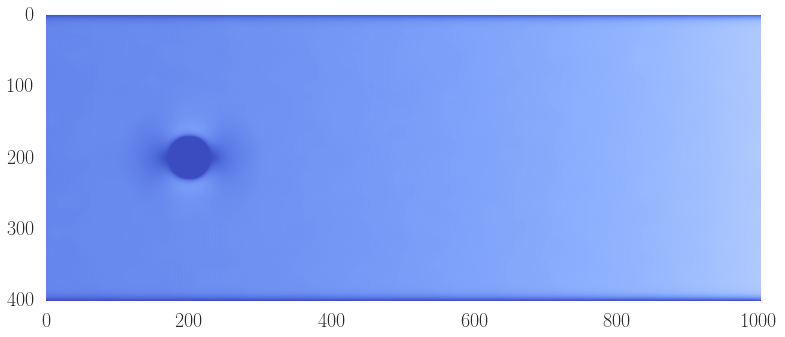

KeyboardInterrupt: 

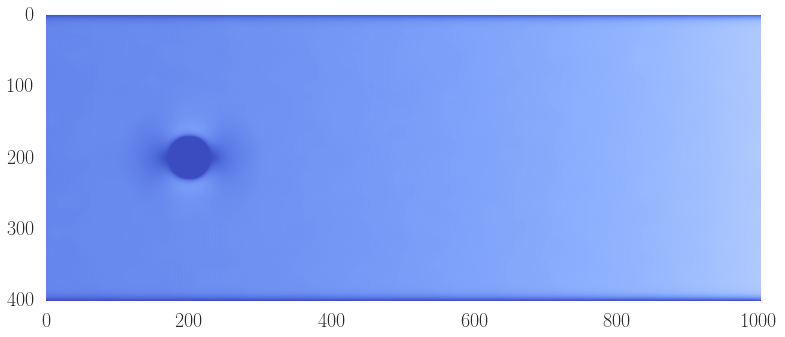

In [12]:
total_num_steps = 5000
steps_per_image= 25

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

Re_list = []
Ma_list = []

plt.figure()
for i in range(num_to_record):
    sim.update_dimensionless_nums()
    Re_list.append(sim.Re)
    Ma_list.append(sim.Ma)
    print 'max non_dim u:', np.max(sim.u)
    print 'sum of mass' , np.sum(sim.rho)/(sim.nx*sim.ny)
    mag = np.sqrt(sim.u**2 + sim.v**2)
    plt.imshow(mag.T, cmap = cm.coolwarm)
    plt.grid(False)
    #plt.clim(vmin=0, vmax=1.)
    #if i == 0:
    #    plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

IDK how to convert...but let's just fit.

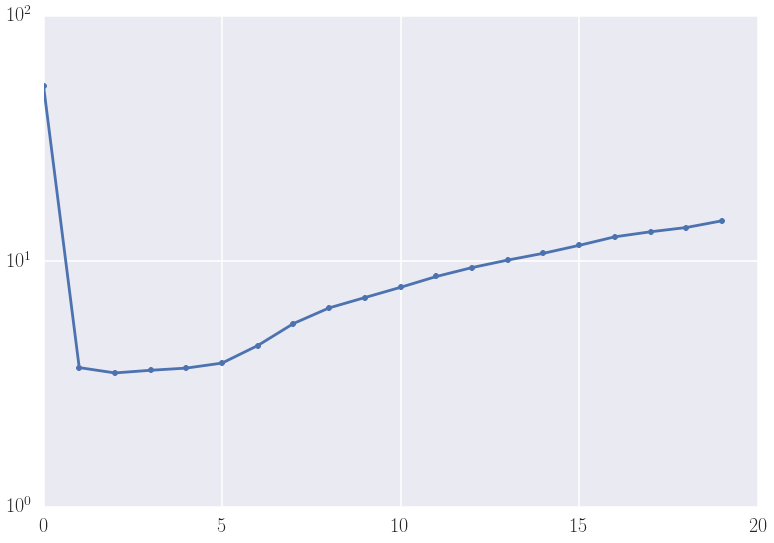

In [47]:
plt.semilogy(Ma_list, ls='-', marker='.')

Nope, it's fucked! lol.

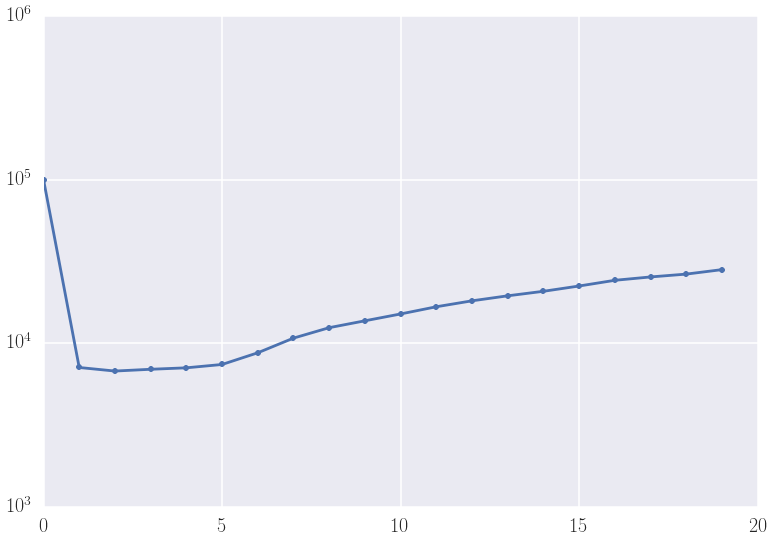

In [48]:
plt.semilogy(Re_list, ls='-', marker='.')

Looks like it still hasn't converged. But, as expected, larger pressure differences leads to larger reynolds numbers!